In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("C:\BIA Projects\Capstone Project\Ecomm\ecommerce.csv")

In [3]:
df.head()

,InvoiceNo,UnitPrice,OrderValue,Quantity,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART


In [4]:
df.shape

(700, 11)

In [5]:
df.isnull().sum()

InvoiceNo         0
UnitPrice         0
OrderValue        0
Quantity          0
Country           0
InvoiceDate       0
InvoiceTime       0
Year-Month        0
Major Category    0
Minor Category    0
Description       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       700 non-null    int64  
 1   UnitPrice       700 non-null    float64
 2   OrderValue      700 non-null    float64
 3   Quantity        700 non-null    int64  
 4   Country         700 non-null    object 
 5   InvoiceDate     700 non-null    object 
 6   InvoiceTime     700 non-null    object 
 7   Year-Month      700 non-null    object 
 8   Major Category  700 non-null    object 
 9   Minor Category  700 non-null    object 
 10  Description     700 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 60.3+ KB


In [7]:
df.columns

Index(['InvoiceNo  ', 'UnitPrice', 'OrderValue', 'Quantity', 'Country',
       'InvoiceDate', 'InvoiceTime', 'Year-Month', 'Major Category',
       'Minor Category', 'Description'],
      dtype='object')

In [8]:
df.drop(columns = ['InvoiceTime','Description'], inplace = True)

In [9]:
df['UnitPrice']=df['UnitPrice'].astype('int')
df['OrderValue']=df['OrderValue'].astype('int')
df['Major Category']=df['Major Category'].astype('category')
df['Minor Category']=df['Minor Category'].astype('category')
df['Country']=df['Country'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   InvoiceNo       700 non-null    int64   
 1   UnitPrice       700 non-null    int32   
 2   OrderValue      700 non-null    int32   
 3   Quantity        700 non-null    int64   
 4   Country         700 non-null    category
 5   InvoiceDate     700 non-null    object  
 6   Year-Month      700 non-null    object  
 7   Major Category  700 non-null    category
 8   Minor Category  700 non-null    category
dtypes: category(3), int32(2), int64(2), object(2)
memory usage: 30.6+ KB


In [11]:
df.describe()

,InvoiceNo,UnitPrice,OrderValue,Quantity
count,700.000000,700.000000,700.000000,700.000000
mean,559180.801429,2.812857,31.510000,20.865714
std,13246.185339,8.286232,63.688047,63.867322
min,536370.000000,0.000000,0.000000,1.000000
25%,547501.000000,1.000000,8.000000,3.000000
50%,559327.500000,1.000000,15.000000,8.000000
75%,570672.000000,3.000000,25.000000,16.000000
max,581587.000000,202.000000,633.000000,1152.000000


In [12]:
df.head()

,InvoiceNo,UnitPrice,OrderValue,Quantity,Country,InvoiceDate,Year-Month,Major Category,Minor Category
0,549185,0,10,12,United Kingdom,7/4/11,2011-04,Clothes,Tops
1,576381,2,35,12,United Kingdom,15/11/11,2011-11,Clothes,Shoes
2,551192,1,20,16,United Kingdom,27/4/11,2011-04,Kitchen,Cutlery
3,573553,7,7,1,United Kingdom,31/10/11,2011-10,Garden,Turf
4,539436,2,2,1,United Kingdom,17/12/10,2010-12,Garden,Hoses


In [13]:
df.duplicated().sum()

2

In [14]:
df[df.duplicated()]

,InvoiceNo,UnitPrice,OrderValue,Quantity,Country,InvoiceDate,Year-Month,Major Category,Minor Category
696,553148,0,13,24,Hong Kong,13/5/11,2011-05,Garden,Hoses
699,564087,1,20,16,Hong Kong,23/8/11,2011-08,Clothes,Tops


In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.head(5)

,InvoiceNo,UnitPrice,OrderValue,Quantity,Country,InvoiceDate,Year-Month,Major Category,Minor Category
0,549185,0,10,12,United Kingdom,7/4/11,2011-04,Clothes,Tops
1,576381,2,35,12,United Kingdom,15/11/11,2011-11,Clothes,Shoes
2,551192,1,20,16,United Kingdom,27/4/11,2011-04,Kitchen,Cutlery
3,573553,7,7,1,United Kingdom,31/10/11,2011-10,Garden,Turf
4,539436,2,2,1,United Kingdom,17/12/10,2010-12,Garden,Hoses


In [17]:
df.duplicated().sum()

0

In [18]:
df[['Year', 'Month']] = df['Year-Month'].str.split('-', expand=True)

In [19]:
df.sample()

,InvoiceNo,UnitPrice,OrderValue,Quantity,Country,InvoiceDate,Year-Month,Major Category,Minor Category,Year,Month
641,545475,3,488,144,Australia,3/3/11,2011-03,Clothes,Hats,2011,03


In [20]:
df['Year-Month'] = pd.to_datetime(df['Year-Month'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])         #Converted 'Year-Month' column to datetime format

In [21]:
df.drop(columns=['Year-Month'], inplace=True)

In [22]:
df.head(5)

,InvoiceNo,UnitPrice,OrderValue,Quantity,Country,InvoiceDate,Major Category,Minor Category,Year,Month
0,549185,0,10,12,United Kingdom,2011-07-04,Clothes,Tops,2011,04
1,576381,2,35,12,United Kingdom,2011-11-15,Clothes,Shoes,2011,11
2,551192,1,20,16,United Kingdom,2011-04-27,Kitchen,Cutlery,2011,04
3,573553,7,7,1,United Kingdom,2011-10-31,Garden,Turf,2011,10
4,539436,2,2,1,United Kingdom,2010-12-17,Garden,Hoses,2010,12


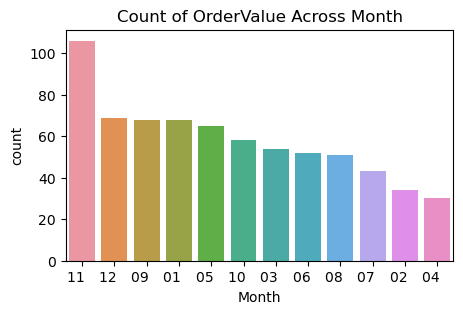

In [23]:
plt.figure(figsize=(5, 3))                                                                           #ordervalue by months
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index)
plt.title('Count of OrderValue Across Month')
plt.show()

*Observation - The order value is highest in the 11th month suggesting a peak in sales during that period and the lowest order value is in the 4th month indicating a potential dip in sales during that period.

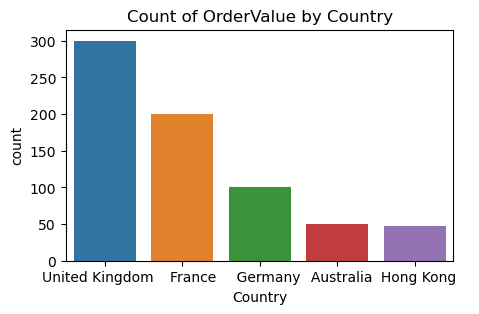

In [24]:
plt.figure(figsize=(5, 3))                                                                 #ordervalue by country
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Count of OrderValue by Country')
plt.show()

*Conclusion - The United Kingdom exhibits the highest and Hong Kong has the lowest sales among the analysed regions. This observation suggests opportunities for targeted marketing efforts and continued focus on meeting the demands of the UK customer base. Comparatively more focus and serious attention is required for Australia and Hong Kong-based customers.

In [25]:
df.columns

Index(['InvoiceNo  ', 'UnitPrice', 'OrderValue', 'Quantity', 'Country',
       'InvoiceDate', 'Major Category', 'Minor Category', 'Year', 'Month'],
      dtype='object')

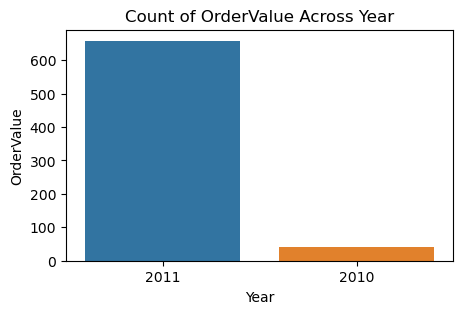

In [26]:
plt.figure(figsize=(5, 3))                  
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index)
plt.title('Count of OrderValue Across Year')
plt.xlabel('Year')
plt.ylabel('OrderValue')
plt.show()

*Observation - The notable surge in order value for 2011 compared to 2010 suggests a substantial increase in customer interest during that period. This could be attributed to improved market conditions, enhanced customer engagement, or successful sales strategies implemented in 2011.




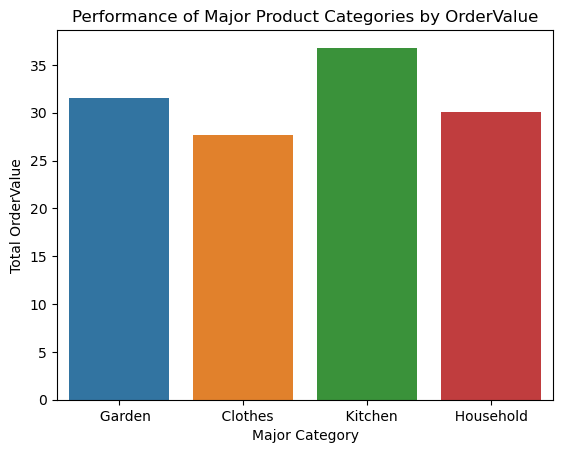

In [27]:
sns.barplot(x='Major Category', y='OrderValue', data=df, ci=None)
plt.title('Performance of Major Product Categories by OrderValue')
plt.xlabel('Major Category')
plt.ylabel('Total OrderValue');

*Observation - The kitchen-related products or items contribute significantly to the overall revenue or sales. This observation suggests that customers are making substantial purchases within the kitchen category, making it a key revenue driver for the business.

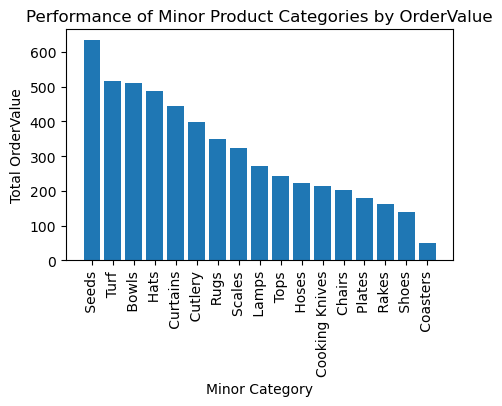

In [28]:
df_sorted = df.sort_values(by='OrderValue', ascending=False)

plt.figure(figsize=(5,3))
plt.bar(df_sorted['Minor Category'], df_sorted['OrderValue'])
plt.title('Performance of Minor Product Categories by OrderValue')
plt.xlabel('Minor Category')
plt.ylabel('Total OrderValue')
plt.xticks(rotation=90);

*Observation - Within a broader category, seeds contribute significantly to overall revenue. This suggests a noteworthy demand or higher transaction values for seed-related products, emphasizing their importance in the context of sales performance.

In [29]:
df.head(2)

,InvoiceNo,UnitPrice,OrderValue,Quantity,Country,InvoiceDate,Major Category,Minor Category,Year,Month
0,549185,0,10,12,United Kingdom,2011-07-04,Clothes,Tops,2011,04
1,576381,2,35,12,United Kingdom,2011-11-15,Clothes,Shoes,2011,11


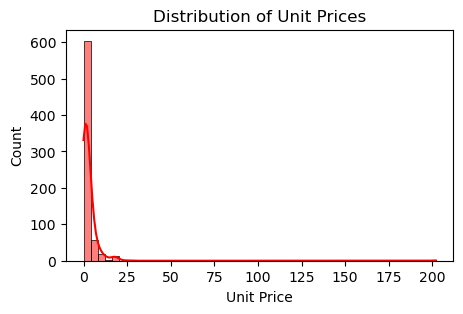

In [30]:
plt.figure(figsize=(5, 3))
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='red')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

*Observation - The majority of unit prices cluster around a central value, forming a slightly right-skewed distribution. The histogram also shows a long tail to the right, indicating a presence of higher-priced items as outliers.

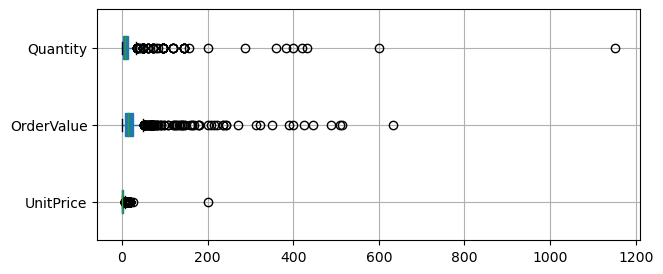

In [31]:
numeric_columns = ['UnitPrice', 'OrderValue', 'Quantity']
plt.figure(figsize=(7, 3))
df[numeric_columns].boxplot(vert=False, patch_artist=True)
plt.show()   

*Observation - The presence of outliers in quantity and unit price indicates the existence of data points that significantly deviate from the typical values in these respective attributes. These outliers may arise from rare events, errors, or unique circumstances, and their identification is crucial for a more accurate understanding of the overall distribution and trends within the dataset.

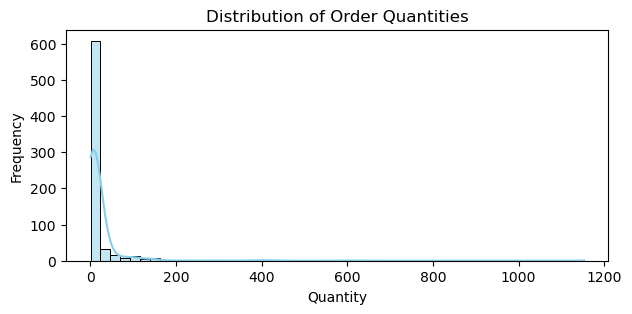

In [32]:
plt.figure(figsize=(7, 3))
sns.histplot(df['Quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

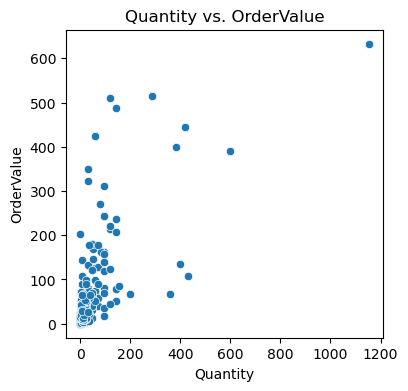

In [33]:
plt.figure(figsize=(9, 4))                                                
plt.subplot(1, 2, 1)
sns.scatterplot(x='Quantity', y='OrderValue', data=df)
plt.title('Quantity vs. OrderValue')
plt.xlabel('Quantity')
plt.ylabel('OrderValue');

*Observation - The scatter plot illustrates the relationship between quantity and order value.  It shows a positive correlation between the two variables, with higher quantities generally associated with higher order values. There are noticeable variations in order value across different quantity levels.

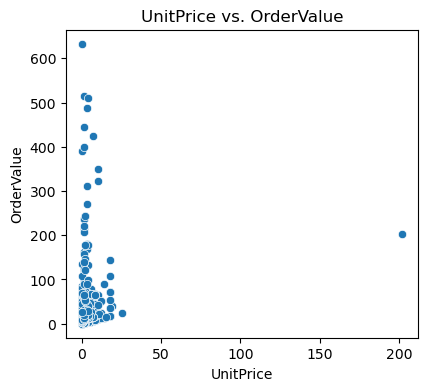

In [34]:
plt.figure(figsize=(10, 4)) 
plt.subplot(1, 2, 2)                                     
sns.scatterplot(x='UnitPrice', y='OrderValue', data=df)
plt.title('UnitPrice vs. OrderValue')
plt.xlabel('UnitPrice')
plt.ylabel('OrderValue');

*Observation - The scatter plot illustrates the relationship between unit price and order value. It seems to be a concentration of data points towards lower unit prices and lower order values, with fewer data points scattered towards higher unit prices and order values.
There is one outlier clearly identified in the plot.

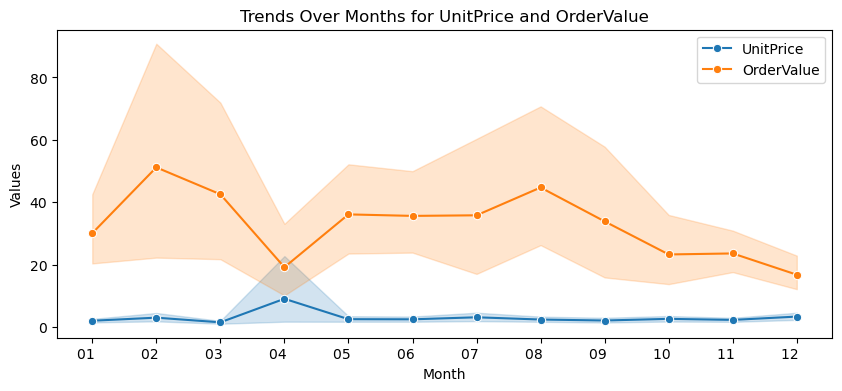

In [35]:
df_sorted = df.sort_values(by='Month', ascending=True)

plt.figure(figsize=(10, 4))
sns.lineplot(x='Month', y='UnitPrice', data=df_sorted, label='UnitPrice', marker='o', sort=False)
sns.lineplot(x='Month', y='OrderValue', data=df_sorted, label='OrderValue', marker='o', sort=False)

plt.title('Trends Over Months for UnitPrice and OrderValue')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend();

*Observation - The above line chart shows the decrease in order value in the fourth month, indicates a simultaneous increase in unit price for the same month.

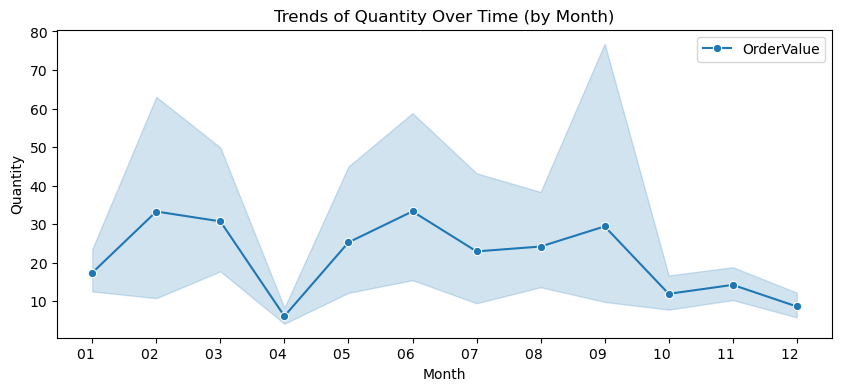

In [36]:
df_sorted = df.sort_values(by='Month', ascending=True)

plt.figure(figsize=(10,4))
sns.lineplot(x='Month', y='Quantity', data=df_sorted, label='OrderValue', marker='o', sort=False)
plt.title('Trends of Quantity Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.show()

*Observation - The line plot depicts the trend of quantity over time by month. It seems to be some fluctuation in quantity over the months, but there is a major decrease in 4th month. 

In [37]:
df.sample()

,InvoiceNo,UnitPrice,OrderValue,Quantity,Country,InvoiceDate,Major Category,Minor Category,Year,Month
180,578251,0,5,7,United Kingdom,2011-11-23,Kitchen,Bowls,2011,11


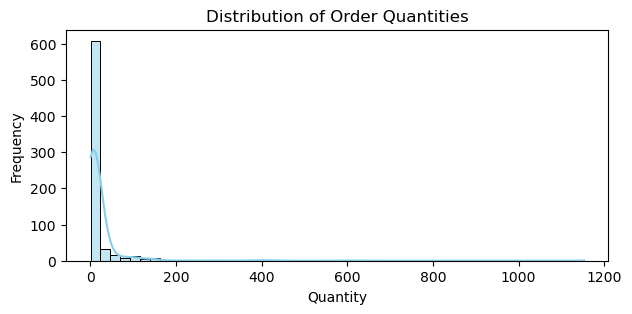

In [38]:
plt.figure(figsize=(7, 3))
sns.histplot(df['Quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

*Observation - 
The histogram illustrates the distribution of order quantities. The majority of orders appear to have quantities clustered within a certain range, with a peak around the lower end of the quantity scale. The distribution displays a slightly right-skewed shape, which is indicating that there are more instances of lower quantities compared to higher quantities in the dataset.

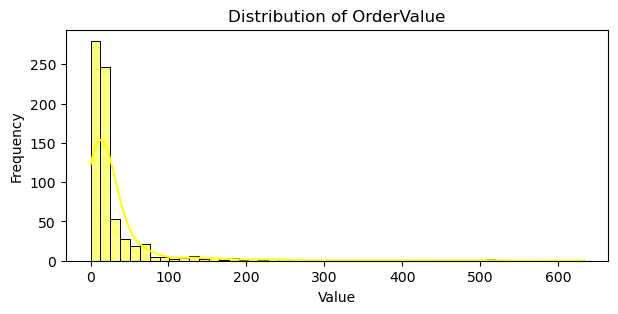

In [39]:
plt.figure(figsize=(7, 3))
sns.histplot(df['OrderValue'], bins=50, kde=True, color='yellow')
plt.title('Distribution of OrderValue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

*Observation - The histogram presents the distribution of order values, the majority of orders fall within a certain value range, with a peak at lower order values. The distribution displays a positively skewed shape, which is indicating that there are more instances of lower order values compared to higher ones in the dataset.

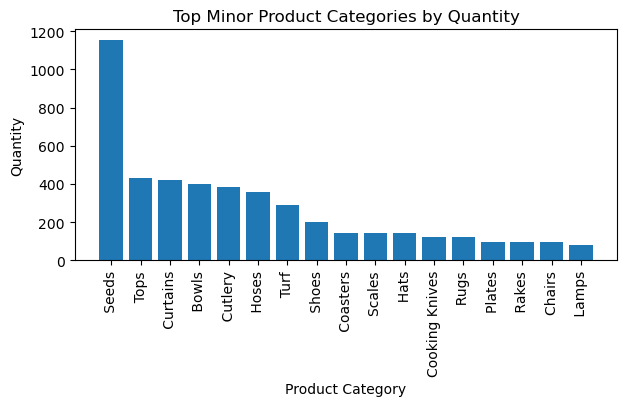

In [40]:
df_sorted = df.sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(7,3))
plt.bar(df_sorted['Minor Category'], df_sorted['Quantity'])
plt.title('Top Minor Product Categories by Quantity')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=90);

*Observation - The higher quantity of seeds sold indicates strong demand for this product category, reflecting potential popularity among customers. This observation suggests that seeds hold a significant market share and contribute notably to overall sales.

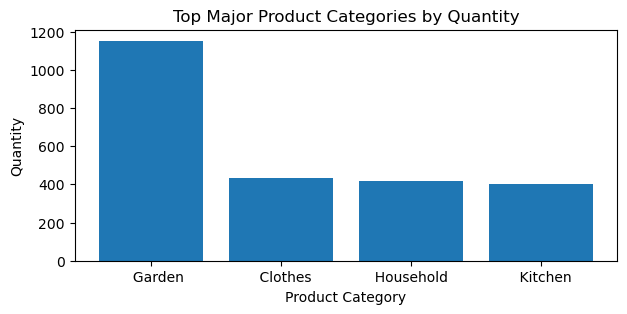

In [41]:
df_sorted = df.sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(7,3))
bars = plt.bar(df_sorted['Major Category'], df_sorted['Quantity'])

plt.title('Top Major Product Categories by Quantity')
plt.xlabel('Product Category')
plt.ylabel('Quantity');

*Observation - The garden category's high quantity of sales suggests strong consumer interest, indicating a popular and in-demand product line. This observation underscores the category's significance in driving overall sales and points to a substantial market demand for garden-related items.

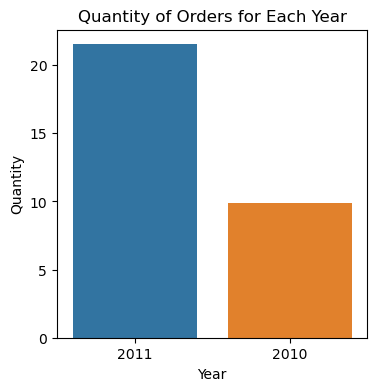

In [42]:
plt.figure(figsize=(4,4))

sns.barplot(x='Year', y='Quantity', data=df, ci=None)
plt.title('Quantity of Orders for Each Year')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show();

*Observation - The higher quantity of products sold in 2011 compared to 2010 indicates a notable increase in sales activity during that period. This suggests potential market growth, increased consumer demand, or improved business performance in the year 2011.

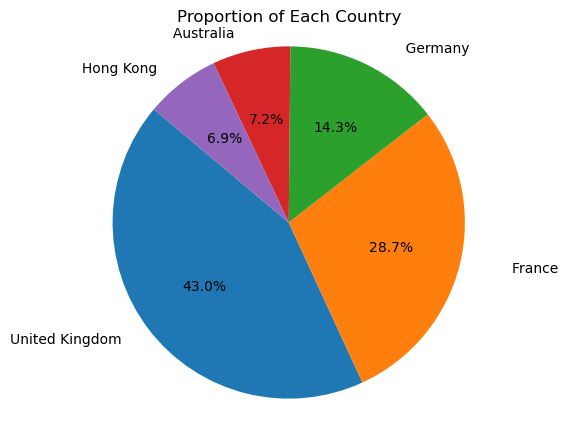

In [43]:
country_counts = df['Country'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Country')
plt.axis('equal')
plt.show()

*Observation - The pie charts represent the proportion of orders from each country, where the United Kingdom has the larger portion of orders. Simultaneously, there is a lower portion of orders from Hong Kong.

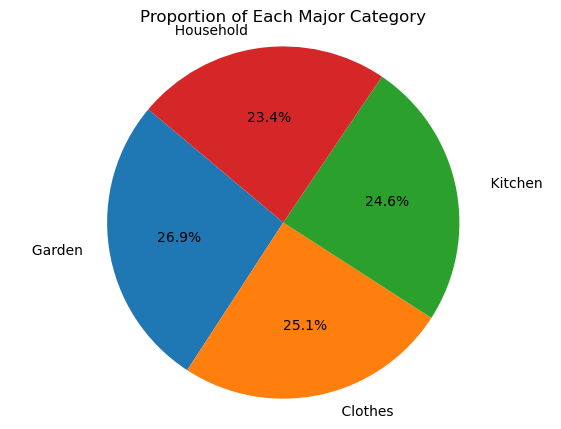

In [44]:
major_category_counts = df['Major Category'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(major_category_counts, labels=major_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Major Category')
plt.axis('equal');

*Observation - The pie chart indicates a relatively and significantly balanced proportion of orders for major category.

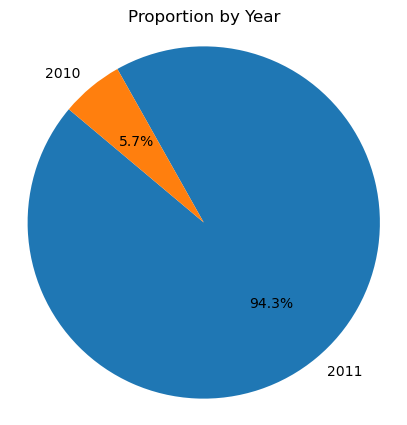

In [45]:
year_counts = df['Year'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion by Year')
plt.axis('equal');

*Observation - The data shows a substantial proportion of orders in 2011 for 94.3% of the total, compared to a smaller proportion of 5.7% in 2010. 

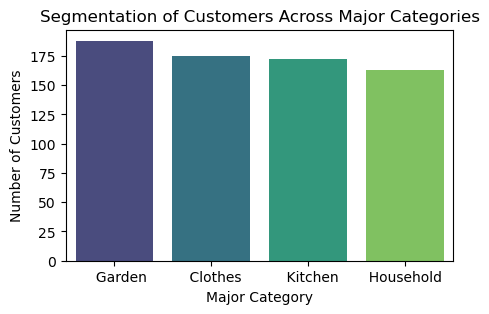

In [46]:
major_category_counts = df['Major Category'].value_counts()

plt.figure(figsize=(5, 3))
sns.barplot(x=major_category_counts.index, y=major_category_counts.values, palette="viridis")
plt.title('Segmentation of Customers Across Major Categories')
plt.xlabel('Major Category')
plt.ylabel('Number of Customers')
plt.show()

*Observation - The plot indicates the segmentation of customers across major categories. The customer base for the major category in the garden is high.

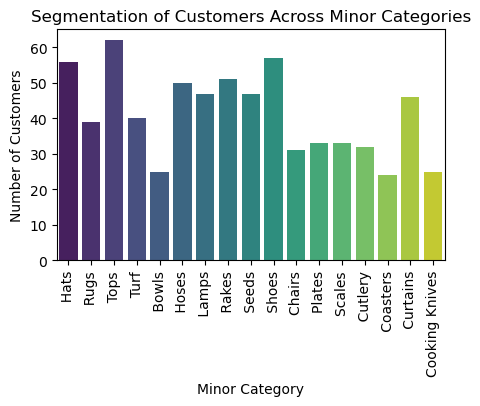

In [47]:
minor_category_counts = df['Minor Category'].value_counts()

plt.figure(figsize=(5, 3))
sns.barplot(x=minor_category_counts.index, y=minor_category_counts.values, palette="viridis")
plt.title('Segmentation of Customers Across Minor Categories')
plt.xlabel('Minor Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

*Observation - The plot indicates the segmentation of customers across minor categories. Here tops has the highest customer base among all.

In [48]:
df.columns

Index(['InvoiceNo  ', 'UnitPrice', 'OrderValue', 'Quantity', 'Country',
       'InvoiceDate', 'Major Category', 'Minor Category', 'Year', 'Month'],
      dtype='object')

In [49]:
df.drop(columns=['InvoiceNo  '], inplace=True)

In [50]:
correlation_matrix = df.corr()

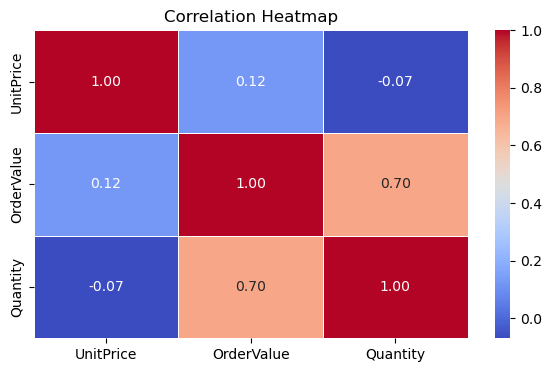

In [51]:
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

*Observation - The correlation heatmap indicates the strength and direction of relationships between variables, with warmer colors representing stronger positive correlations and cooler colors indicating stronger negative correlations. 

In [52]:
df.columns

Index(['UnitPrice', 'OrderValue', 'Quantity', 'Country', 'InvoiceDate',
       'Major Category', 'Minor Category', 'Year', 'Month'],
      dtype='object')

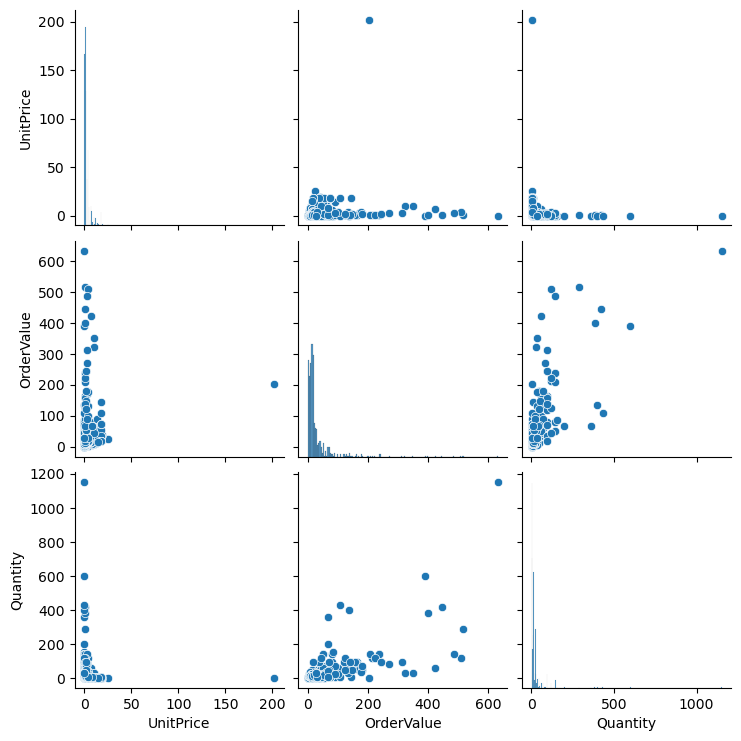

In [53]:
numeric_columns = ['UnitPrice', 'OrderValue', 'Quantity']

sns.pairplot(df[numeric_columns])
plt.show();

*Observation - The pair plot provides a visual overview of the relationships between numeric variables including unit price, order value, and quantity. It reveals some patterns, such as a positive correlation between order value and quantity, as well as potential outliers in certain relationships.

## Handling Outliers

In [54]:
replacement_value = 99                                         #0.99 value quantile suitable for dataset

unit_price_threshold = df['UnitPrice'].quantile(0.99)
df['UnitPrice'] = df['UnitPrice'].clip(upper=unit_price_threshold, inplace=False)

quantity_threshold = df['Quantity'].quantile(0.99)
df['Quantity'] = df['Quantity'].clip(upper=quantity_threshold, inplace=False)

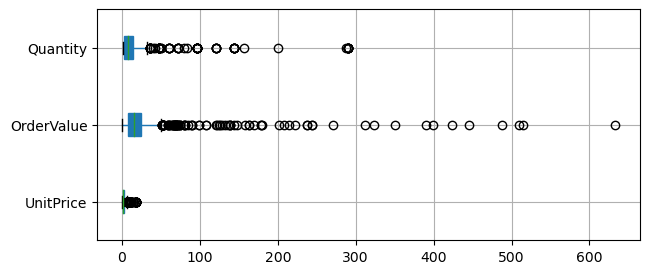

In [55]:
numeric_columns = ['UnitPrice', 'OrderValue', 'Quantity']
plt.figure(figsize=(7, 3))
df[numeric_columns].boxplot(vert=False, patch_artist=True)
plt.show()   

The code calculates the 99th percentile threshold for 'UnitPrice' and 'Quantity' columns. It replaces values above these thresholds with the threshold value. The replacements ensure that extreme outliers are capped at the 99th percentile value, thus handling outliers without removing them outright.

## Conclusion

The data analysis reveals several key trends and insights.

1 . The surge in order value from 2010 to 2011 suggests overall growth. Overall, 2011 saw a higher quantity of products sold compared to 2010, emphasizing a positive trend in sales volume.

2 . The 11th month stands out with the highest order value, showcasing a potential peak in consumer activity. The United Kingdom leads in sales, while Hong Kong exhibits the lowest performance.

3 . Kitchen-related products play a significant role in contributing to sales, with seeds notably contributing to overall revenue. The higher quantity of seeds sold and the garden category's substantial sales indicate specific product categories driving revenue.

4 . A notable decrease in order value in the fourth month coincides with a simultaneous increase in unit price, suggesting a potential shift in purchasing patterns. 

5 . The presence of outliers in quantity and unit price requires further investigation for potential anomalies. 

6 . Overall, the distribution appears to be unimodal, with most unit prices concentrated within a certain range. The plot highlights the general trend of increasing order value with higher quantities ordered 

7 . The heatmap highlights significant correlations that may exist within the data, providing insights into potential patterns or dependencies between variables. It also shows a substantial proportion of orders, major category and country.

8 . The distribution of orders across different countries, providing insights into the geographic distribution of customers or sales. A notable increase in order volume from 2010 to 2011, indicating potential growth or changes in business operations, market dynamics, or customer behavior during that time period.